In [6]:
# Dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime

sns.set("notebook", font_scale=1.05, rc={"figure.figsize": (10, 5)})
sns.set_style("ticks", rc={"figure.facecolor": "none", "axes.facecolor": "none"})
%config InlineBackend.figure_format = 'svg'
warnings.filterwarnings("ignore")
plt.set_loglevel("WARNING")
mpl.rcParams["lines.markersize"] = 8

# generate datetime string
now = datetime.datetime.now()
now_str = now.strftime("%m_%d_%H_%M")

In [ ]:
WINDOW_SIZE = 250

PATH = "..."

# Load data
df_goal = pd.read_csv(PATH + "perc_goal_uptime.csv")
df_collisions = pd.read_csv(PATH + "perc_collisions_step.csv")
df_reward = pd.read_csv(PATH + "mean_rew_step.csv")

df_goal

In [45]:
global_step = df_reward['global_step'].values
time = df_goal['performance/uptime'].values / 3600

reward = df_reward['PPO____S_1000__02_26_08_54_58_289 - metrics/mean_episode_reward_per_agent'].rolling(window=WINDOW_SIZE).mean().values
offroad = df_collisions['PPO____S_1000__02_26_08_54_58_289 - metrics/perc_off_road'].rolling(window=WINDOW_SIZE).mean().values * 100
collision = df_collisions['PPO____S_1000__02_26_08_54_58_289 - metrics/perc_veh_collisions'].rolling(window=WINDOW_SIZE).mean().values * 100
goal_achieved = df_goal['PPO____S_1000__02_26_08_54_58_289 - metrics/perc_goal_achieved'].rolling(window=WINDOW_SIZE).mean().values * 100


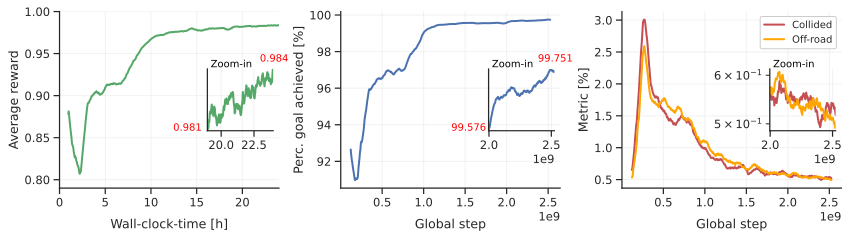

In [48]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.ticker as ticker

# Define constant for the number of steps to zoom in
ZOOM_STEPS = 2000

fig, axs = plt.subplots(1, 3, figsize=(12, 3.5))

# First axis (Average reward)
axs[0].plot(time, reward, color='g', linewidth=2)
axs[0].grid(True, color='lightgrey', alpha=0.3)
axs[0].set_xlabel("Wall-clock-time [h]", labelpad=10)
axs[0].set_ylabel("Average reward")
axs[0].set_xlim([0, 24])
axs[0].set_ylim([0.79, 1])

# Inset for the first axis (zoom-in on last ZOOM_STEPS steps)
axins0 = inset_axes(axs[0], width="30%", height="35%", loc="center right")  # Slightly increased height
axins0.plot(time[-ZOOM_STEPS:], reward[-ZOOM_STEPS:], color='g', linewidth=2)
axins0.grid(True, color='lightgrey', alpha=0.3)
axins0.set_xlim(time[-ZOOM_STEPS], time[-1])
axins0.set_ylim(min(reward[-ZOOM_STEPS:]), max(reward[-ZOOM_STEPS:]))
axins0.set_yscale('log')

# Label for the zoom-in plot
axins0.text(0.05, 1.15, 'Zoom-in', transform=axins0.transAxes, fontsize=10, color='black', ha='left', va='top')

# Hide y-axis labels and ticks
axins0.get_yaxis().set_visible(False)

# Annotate the min and max values in red
min_value = min(reward[-ZOOM_STEPS:])
max_value = max(reward[-ZOOM_STEPS:])

# Annotating min and max values
axins0.annotate(f'{min_value:.3f}', xy=(time[-ZOOM_STEPS], min_value), xytext=(-20, -2),
                textcoords='offset points', color='red', fontsize=10, ha='center', va='bottom')
axins0.annotate(f'{max_value:.3f}', xy=(time[-ZOOM_STEPS], max_value), xytext=(67, 15),
                textcoords='offset points', color='red', fontsize=10, ha='center', va='top')

# Second axis (Goal achieved)
axs[1].plot(global_step, goal_achieved, color='b', linewidth=2)
axs[1].grid(True, color='lightgrey', alpha=0.3)
axs[1].set_xlabel("Global step", labelpad=10)
axs[1].set_ylabel("Perc. goal achieved [%]")

# Inset for the second axis (zoom-in on last ZOOM_STEPS steps)
axins1 = inset_axes(axs[1], width="30%", height="35%", loc="center right")  # Slightly increased height
axins1.plot(global_step[-ZOOM_STEPS:], goal_achieved[-ZOOM_STEPS:], color='b', linewidth=2)
axins1.grid(True, color='lightgrey', alpha=0.3)
axins1.set_xlim(global_step[-ZOOM_STEPS], global_step[-1])
axins1.set_ylim(min(goal_achieved[-ZOOM_STEPS:]), max(goal_achieved[-ZOOM_STEPS:]))
axins1.set_yscale('log')

# Label for the zoom-in plot
axins1.text(0.05, 1.15, 'Zoom-in', transform=axins1.transAxes, fontsize=10, color='black', ha='left', va='top')

# Format y-axis labels of the inset plot
for tick in axins1.get_yticklabels():
    tick.set_rotation(0)
    tick.set_fontsize(1)

axins1.get_yaxis().set_visible(False)

# Annotate the min and max values in red
min_value = min(goal_achieved[-ZOOM_STEPS:])
max_value = max(goal_achieved[-ZOOM_STEPS:])

# Annotating min and max values
axins1.annotate(f'{min_value:.3f}', xy=(global_step[-ZOOM_STEPS], min_value), xytext=(-20, -2),
                textcoords='offset points', color='red', fontsize=10, ha='center', va='bottom')
axins1.annotate(f'{max_value:.3f}', xy=(global_step[-ZOOM_STEPS], max_value), xytext=(67, 15),
                textcoords='offset points', color='red', fontsize=10, ha='center', va='top')


# Third axis (Collisions and Off-road)
axs[2].plot(global_step, collision, color='r', label='Collided', linewidth=2)
axs[2].plot(global_step, offroad, color='orange', label='Off-road', linewidth=2)
axs[2].grid(True, color='lightgrey', alpha=0.3)
axs[2].set_xlabel("Global step", labelpad=10)
axs[2].set_ylabel("Metric [%]")
#axs[2].set_yscale('log')
axs[2].legend(facecolor='white', framealpha=1, fontsize=10)

# Inset for the third axis (zoom-in on last ZOOM_STEPS steps)
axins2 = inset_axes(axs[2], width="30%", height="35%", loc="center right")  # Slightly increased height
axins2.plot(global_step[-ZOOM_STEPS:], collision[-ZOOM_STEPS:], color='r', linewidth=2)
axins2.plot(global_step[-ZOOM_STEPS:], offroad[-ZOOM_STEPS:], color='orange', linewidth=2)
axins2.grid(True, color='lightgrey', alpha=0.3)
axins2.set_xlim(global_step[-ZOOM_STEPS], global_step[-1])
axins2.set_yscale('log')

# Label for the zoom-in plot
axins2.text(0.05, 1.15, 'Zoom-in', transform=axins2.transAxes, fontsize=10, color='black', ha='left', va='top')

# Format y-axis labels of the inset plot
for tick in axins2.get_yticklabels():
    tick.set_rotation(0)
    tick.set_fontsize(6)

# Disable scientific notation for y-axis
axins2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.2f}'))

sns.despine()
plt.tight_layout()
plt.savefig(f'training_curves.pdf', bbox_inches='tight', format='pdf')
